## Introduction
Researchers have noted the similarites between the human SARS Corona virus COVID-19, and suspect its origin from the bat version of this virus. This mutation and how it spreads to humans may be better understood by building some visual and analytical tools, with data from the National Center for Biotechnology Information (NCBI) let's get started!

## Exploratory Analysis
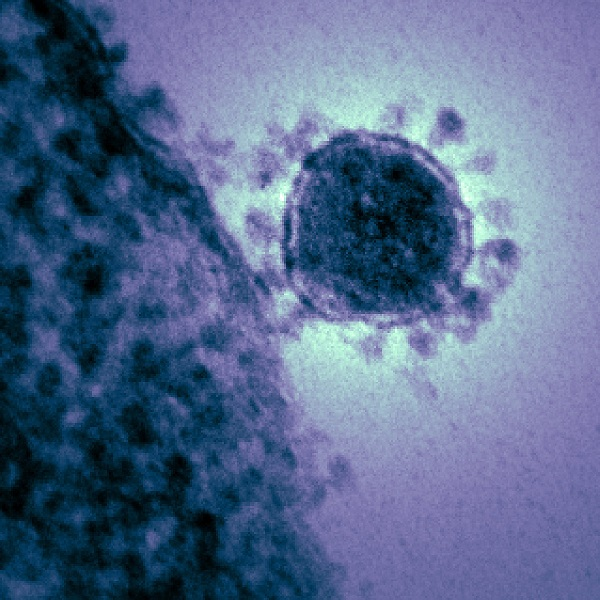


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/MN997409.1-4NY0T82X016-Alignment-HitTable.csv
/kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv
/kaggle/input/SARS_CORONAVIRUS_NC_045512_sequence.fasta
/kaggle/input/MN997409.1_4NY0T82X016-Alignment.xml
/kaggle/input/BAT_SARS_LIKE_coronavirus_complete_genome_sequence.fasta
/kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/MN997409.1-4NY0T82X016-Alignment-HitTable.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# MN997409.1-4NY0T82X016-Alignment-HitTable.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/MN997409.1-4NY0T82X016-Alignment-HitTable.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'MN997409.1-4NY0T82X016-Alignment-HitTable.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 262 rows and 12 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,MN997409.1,MN997409.1.1,100.000,29882,0,0.1,1,29882.1,1.1,29882.2,0.0,55182
0,MN997409.1,MT020881.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
1,MN997409.1,MT020880.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
2,MN997409.1,MN985325.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
3,MN997409.1,MN975262.1,99.990,29882,3,0,1,29882,1,29882,0.0,55166
4,MN997409.1,LC522974.1,99.993,29878,2,0,4,29881,1,29878,0.0,55164


Distribution graphs (histogram/bar graph) of sampled columns:

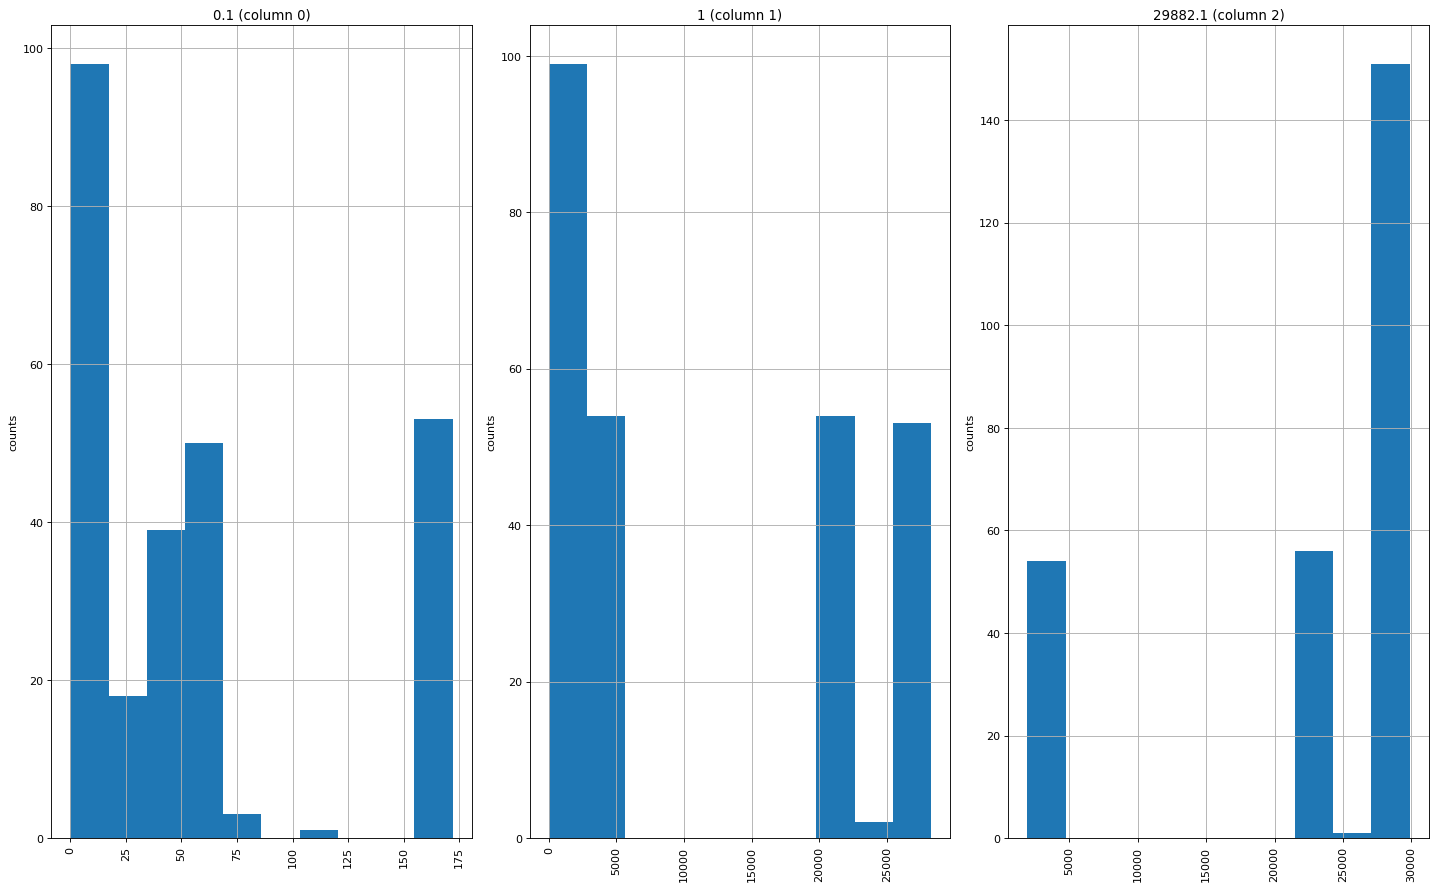

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

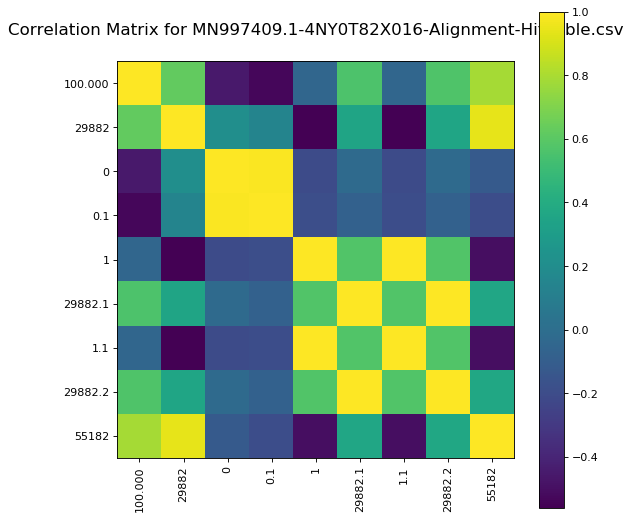

In [9]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

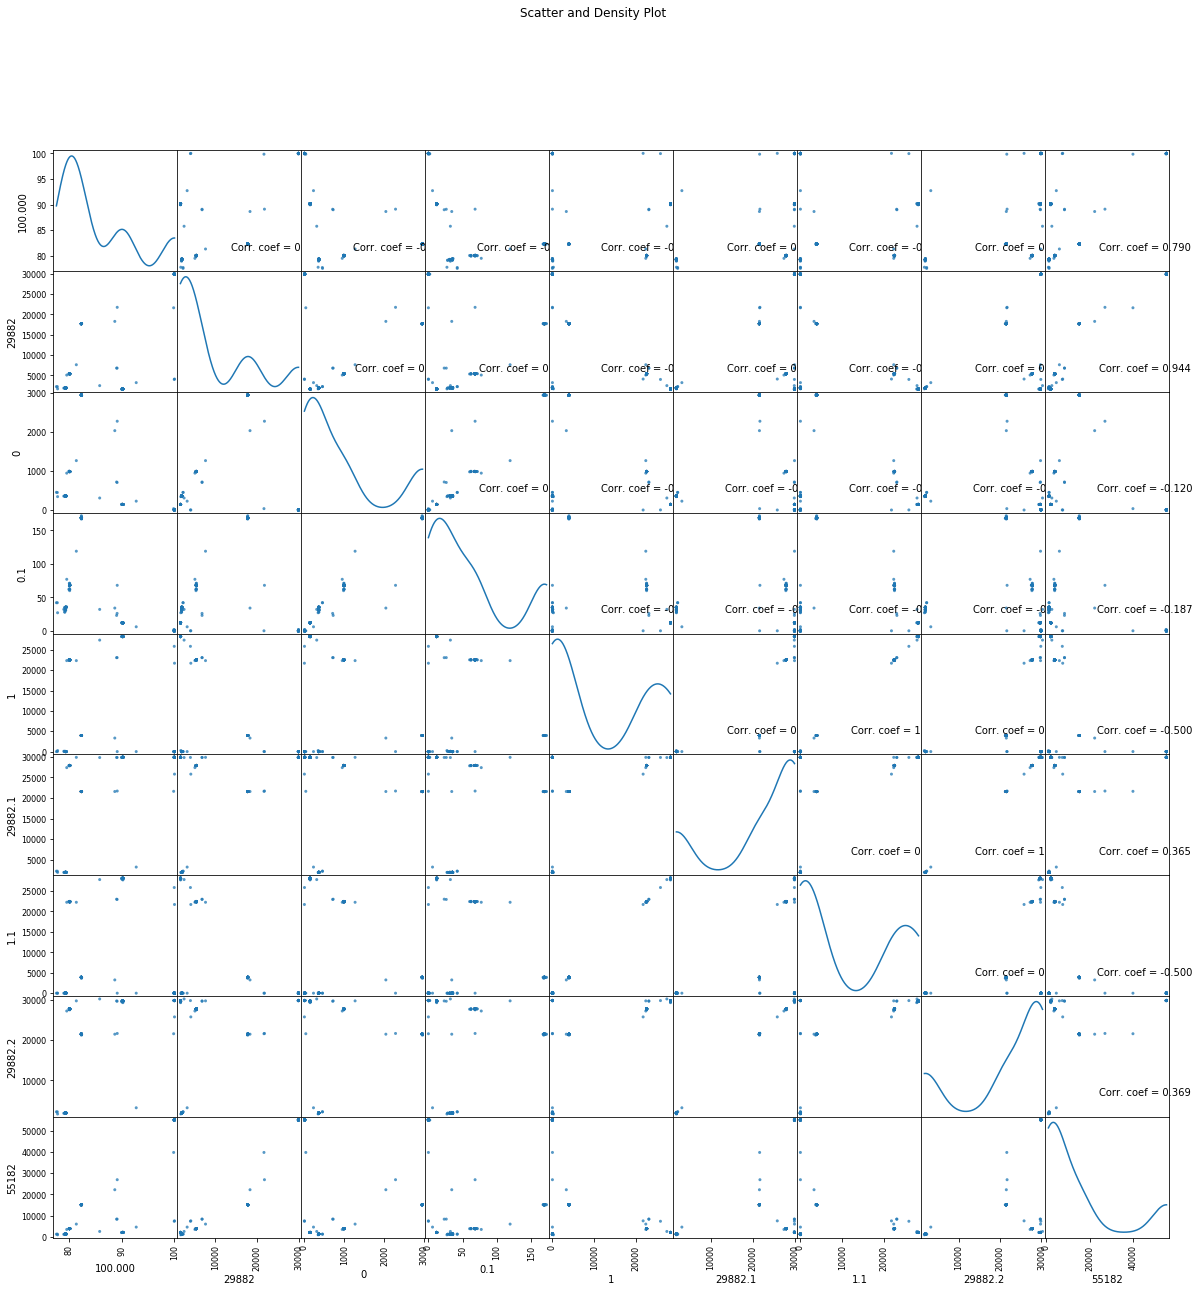

In [10]:
plotScatterMatrix(df1, 20, 10)

### Let's check 2nd file: /kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv

In [11]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'SARS_CORONAVIRUS_287BP_MN975263.1_accession_nucleotide.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 79 rows and 17 columns


Let's take a quick look at what the data looks like:

In [12]:
df2.head(5)

,Details,Accession,Release_Date,Species,Genus,Family,Length,Nuc._Completeness,Genotype,Genome_Region,Segment,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NaN,LR757995,2020-02-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA6507893,Wuhan seafood market pneumonia virus genome as...
1,NaN,LR757998,2020-02-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA6507890,Wuhan seafood market pneumonia virus genome as...
2,NaN,LR757997,2020-02-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA6507891,Wuhan seafood market pneumonia virus genome as...
3,NaN,LR757996,2020-02-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMEA6507892,Wuhan seafood market pneumonia virus genome as...
4,NaN,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,"refseq, complete",NaN,NaN,NaN,China,Homo sapiens,NaN,2019-12,NaN,Wuhan seafood market pneumonia virus isolate W...


Distribution graphs (histogram/bar graph) of sampled columns:

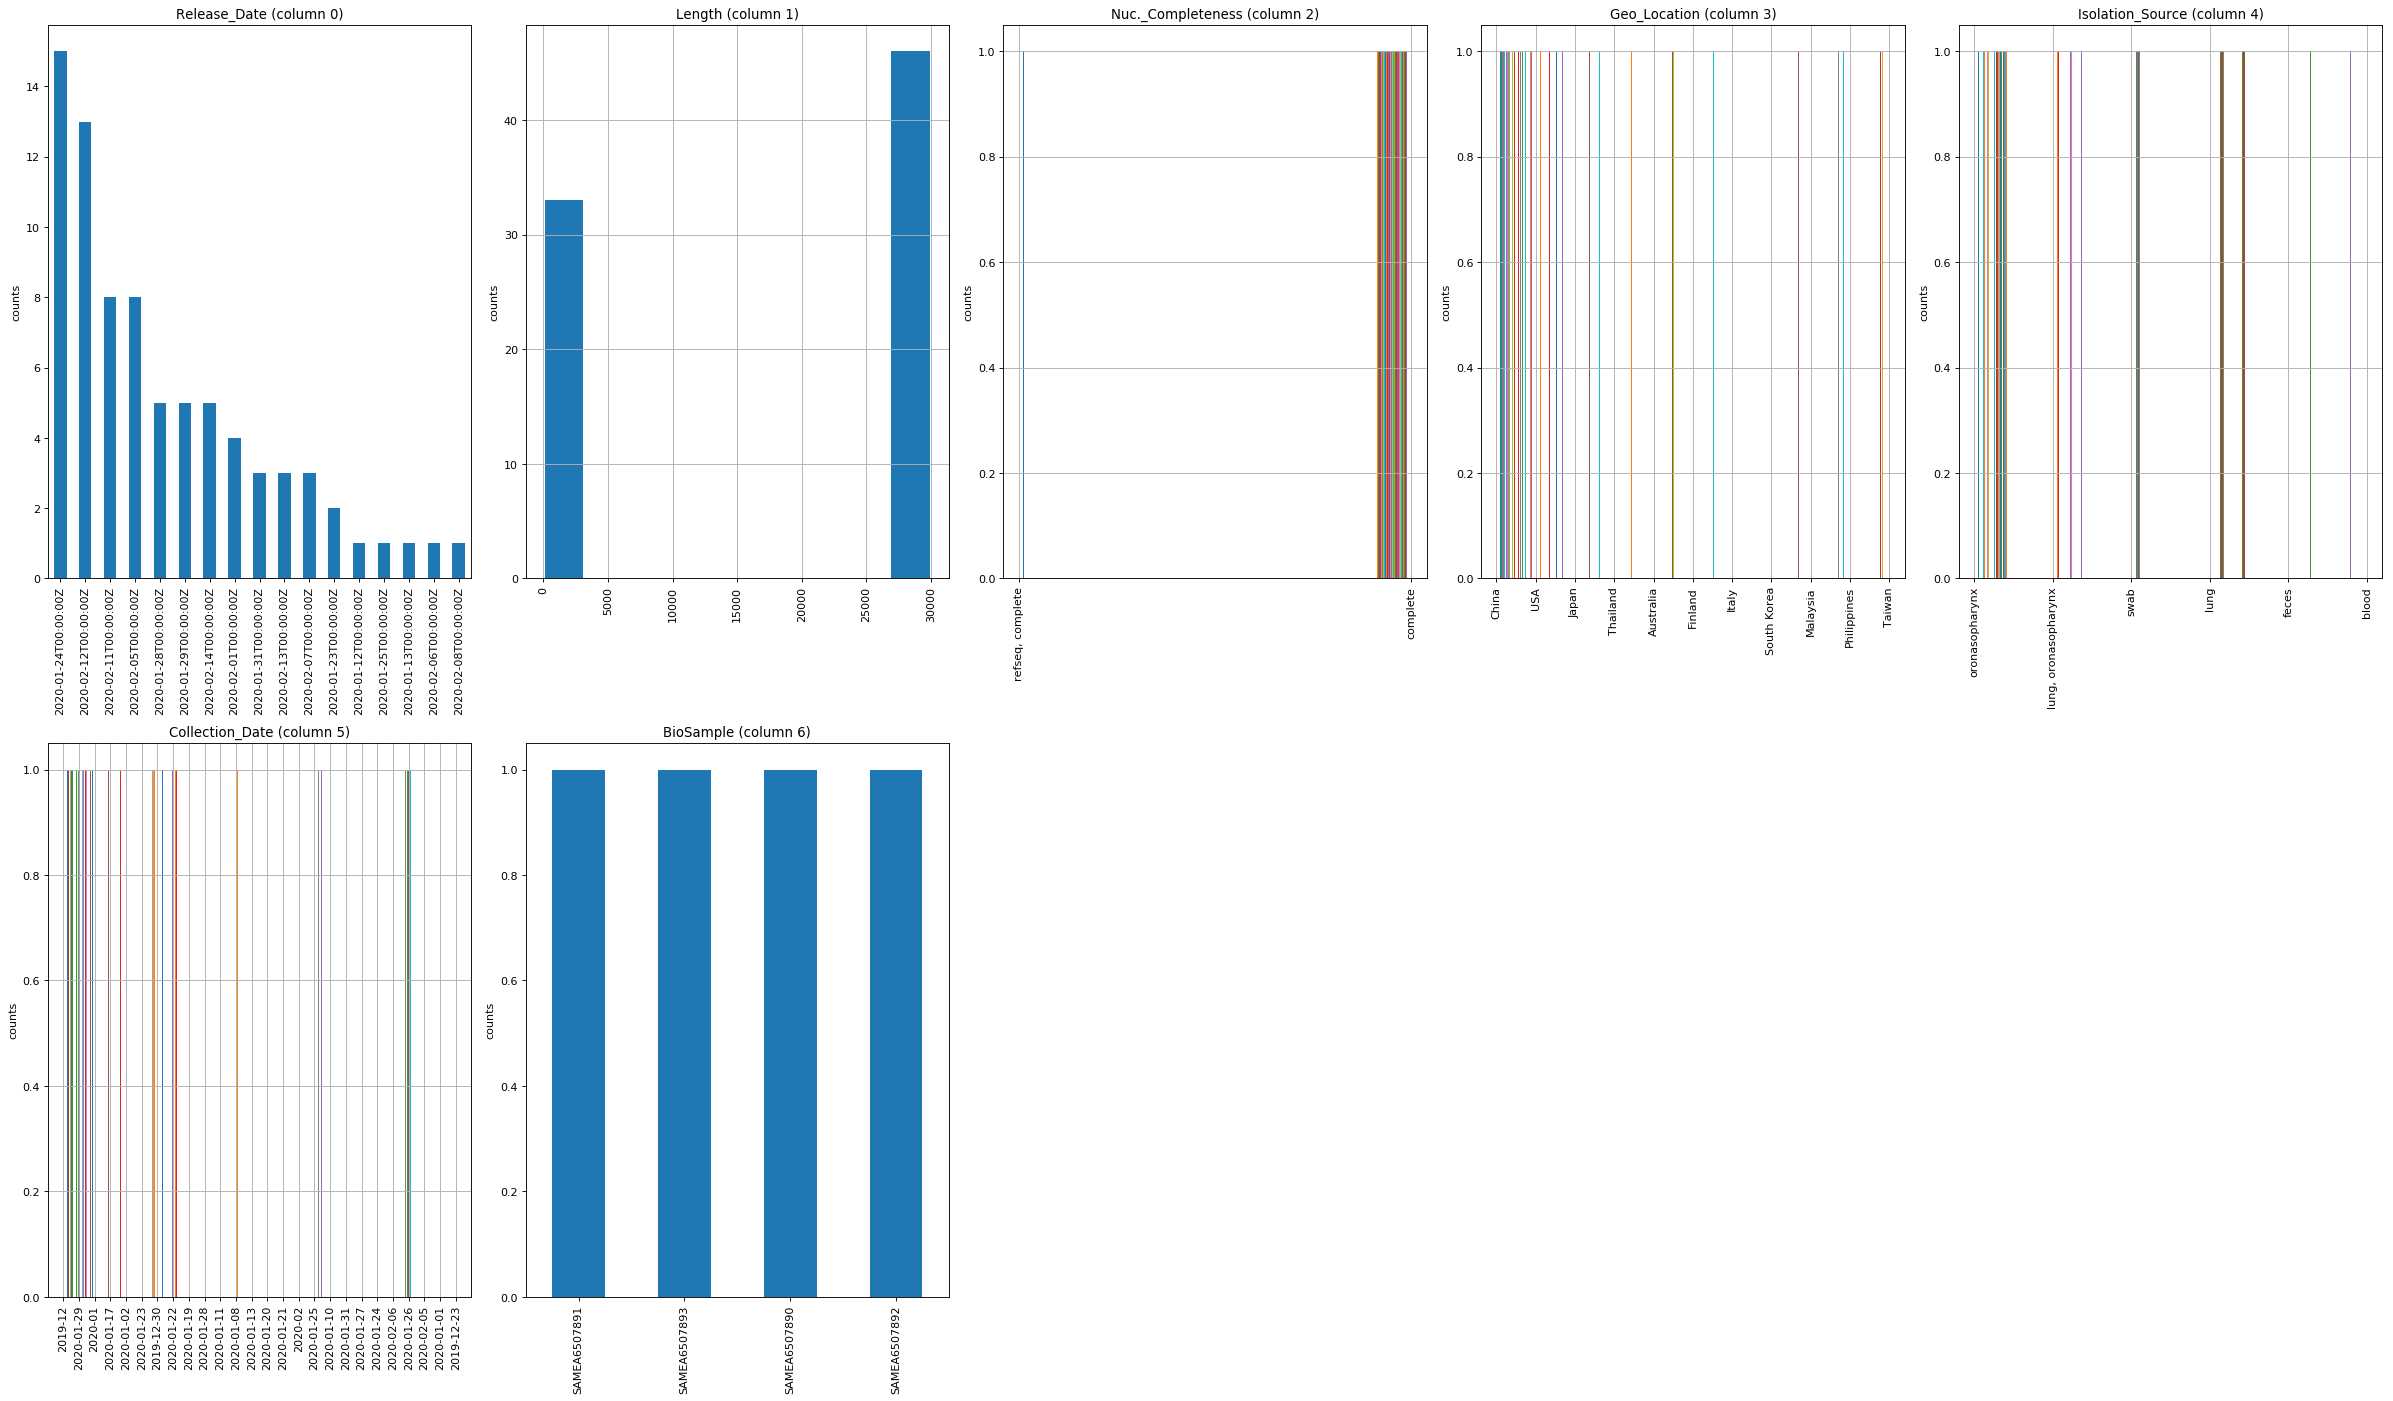

In [13]:
plotPerColumnDistribution(df2, 10, 5)

### Let's check 3rd file: /kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv

In [14]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/kaggle/input/SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'SARS_CORONAVIRUS_287BP_MN975263.1_accession_protein.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 464 rows and 17 columns


Let's take a quick look at what the data looks like:

In [15]:
df3.head(5)

,Details,Accession,Release_Date,Species,Genus,Family,Length,Genotype,Genome_Region,Segment,Protein,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NaN,YP_009724389,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,7096,NaN,NaN,NaN,orf1ab polyprotein,China,Homo sapiens,NaN,2019-12,NaN,orf1ab polyprotein [Wuhan seafood market pneum...
1,NaN,YP_009725255,2020-01-17T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,38,NaN,NaN,NaN,ORF10 protein,China,Homo sapiens,NaN,2019-12,NaN,ORF10 protein [Wuhan seafood market pneumonia ...
2,NaN,YP_009725295,2020-01-28T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,4405,NaN,NaN,NaN,orf1a polyprotein,China,Homo sapiens,NaN,2019-12,NaN,orf1a polyprotein [Wuhan seafood market pneumo...
3,NaN,YP_009725296,2020-01-28T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,43,NaN,NaN,NaN,ORF7b,China,Homo sapiens,NaN,2019-12,NaN,ORF7b [Wuhan seafood market pneumonia virus]
4,NaN,YP_009724390,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,1273,NaN,NaN,NaN,surface glycoprotein,China,Homo sapiens,NaN,2019-12,NaN,surface glycoprotein [Wuhan seafood market pne...


Distribution graphs (histogram/bar graph) of sampled columns:

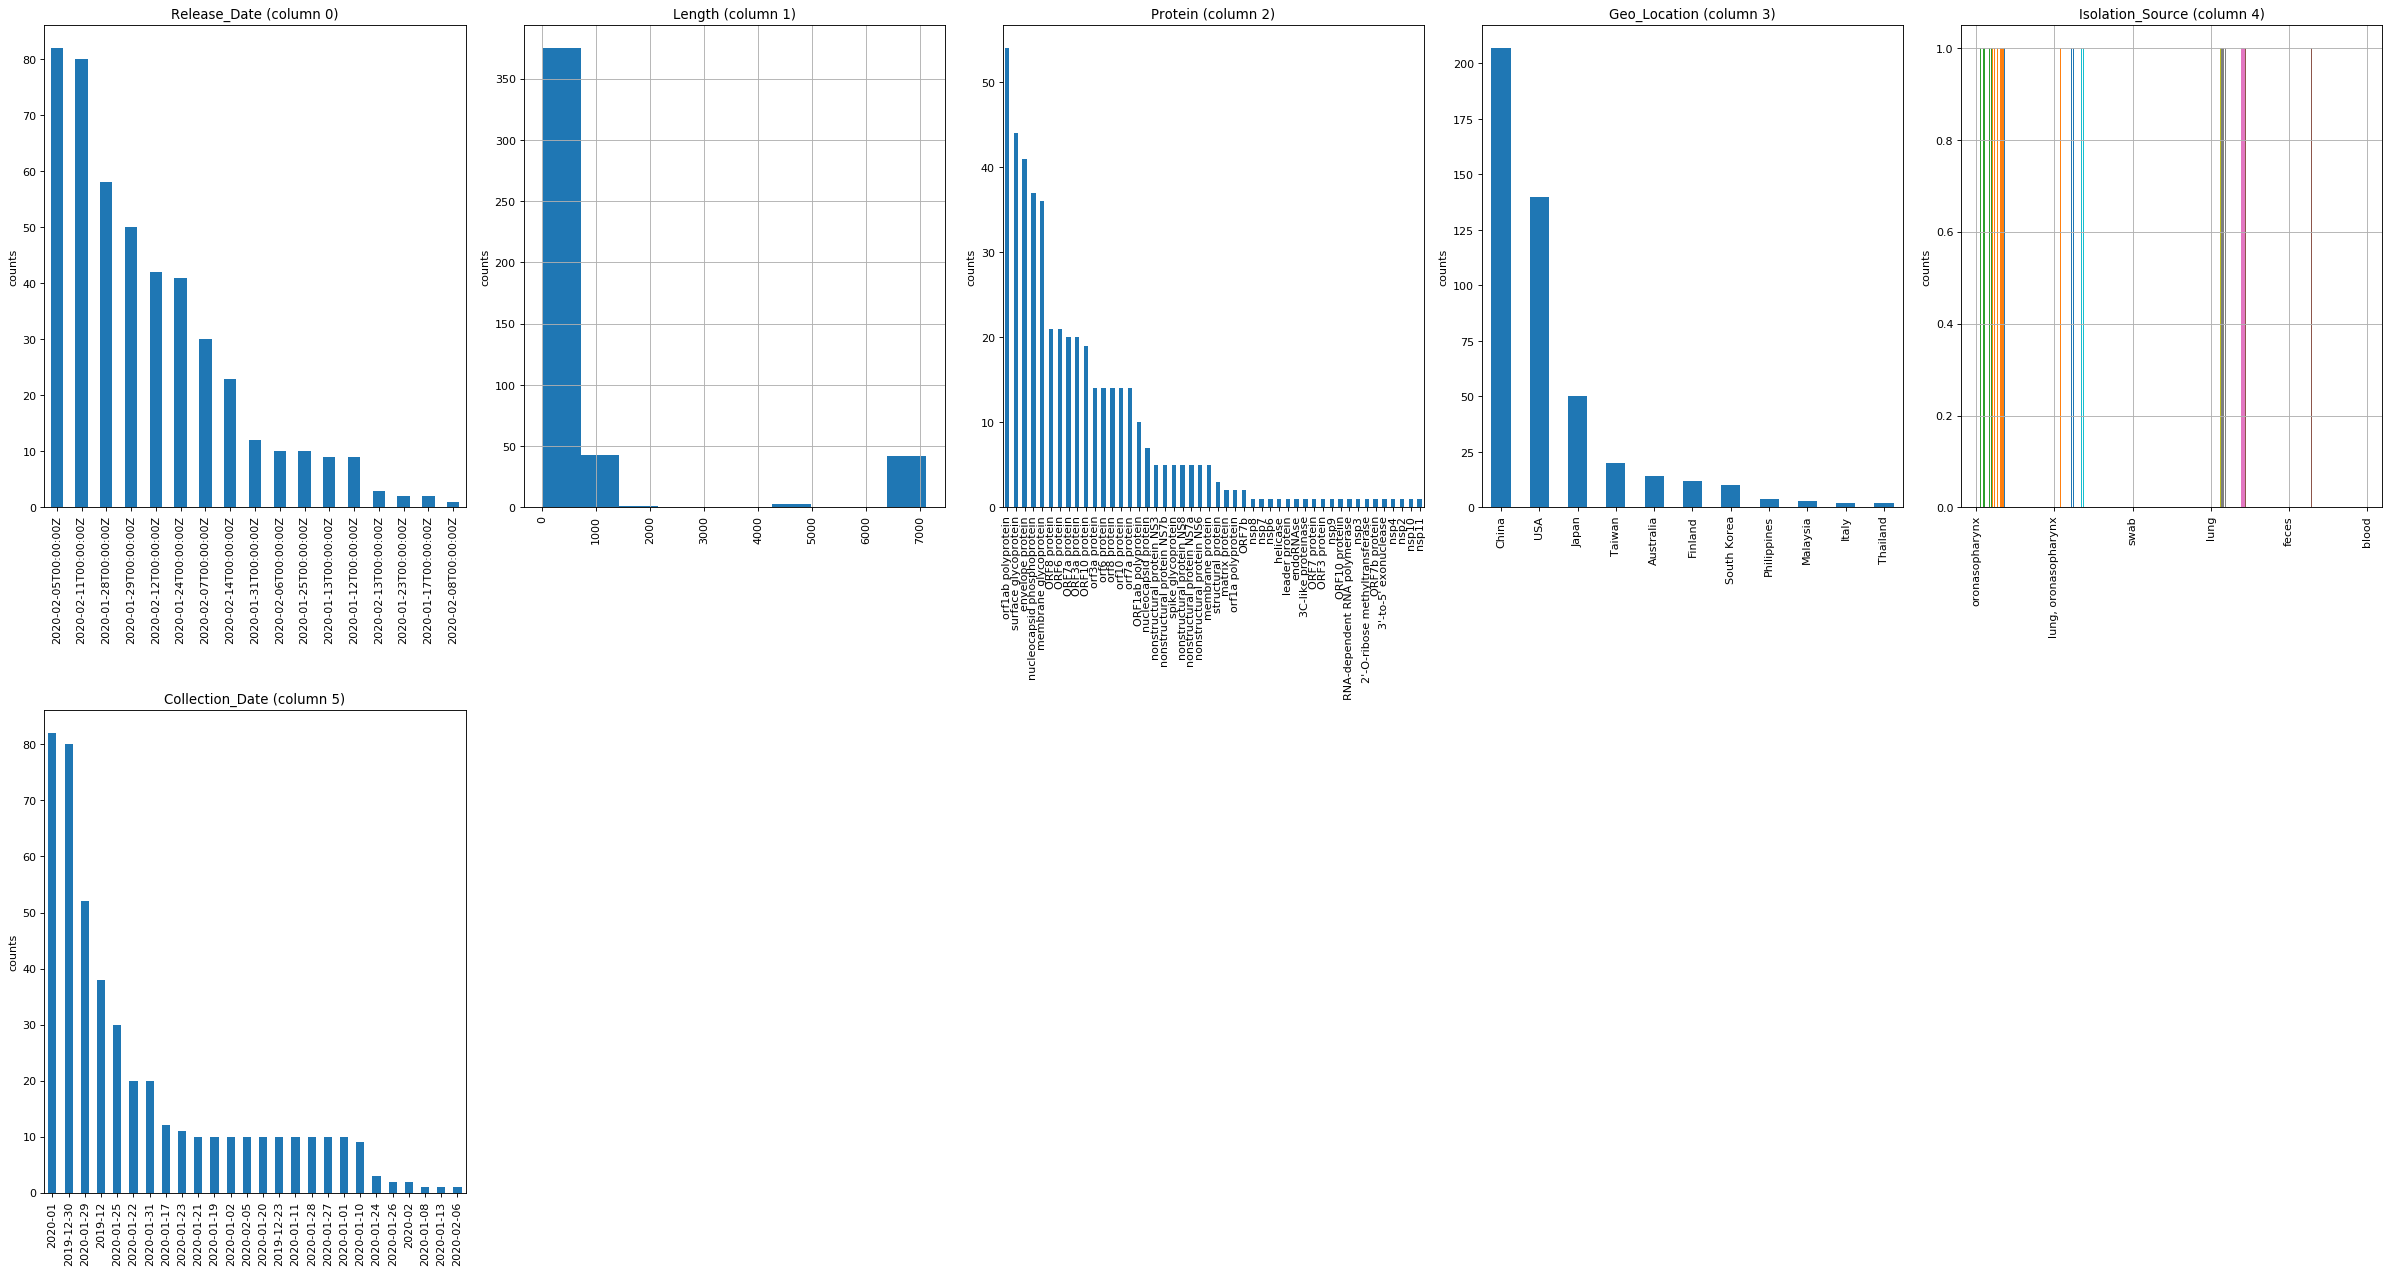

In [16]:
plotPerColumnDistribution(df3, 10, 5)

## Conclusion
